In [1]:
setwd("/Users/bakaibaiazbekov/Documents/unsorted")

In [4]:
#install.packages('tidyverse')
library(tidyverse)
#library(stringdist)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
output <- read_csv2("output-Table 1.csv")
unsorted <- read_csv2("unsorted-Table 1.csv")
clu5 <- read_csv2("clu5 top labels-Table 1.csv")

head(output)
head(unsorted)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  dim1 = col_double(),
  dim2 = col_double(),
  CLU15 = col_double(),
  CLU14 = col_double(),
  CLU13 = col_double(),
  CLU12 = col_double(),
  CLU11 = col_double(),
  CLU10 = col_double(),
  CLU9 = col_double(),
  CLU8 = col_double(),
  CLU7 = col_double(),
  CLU6 = col_double(),
  CLU5 = col_double(),
  item_num = col_double(),
  item_text = col_character()
)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Warning message:
“Missing column names filled in: 'X3' [3], 'X4' [4], 'X5' [5]”
Parsed with column specification:
cols(
  unsorted_id = col_character(),
  unsorted_content = col_character(),
  X3 = col_logical(),
  X4 = col_logical(),
  X5 = col_logical()
)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Label ID` = col_double(),
  `Label text` = c

dim1,dim2,CLU15,CLU14,CLU13,CLU12,CLU11,CLU10,CLU9,CLU8,CLU7,CLU6,CLU5,item_num,item_text
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.16485037,-0.6427448,1,1,1,1,1,1,1,1,1,1,1,1,1. Challenge the audience to question their practice
0.32164576,0.7572175,2,2,2,2,2,2,2,2,2,2,2,2,"2. Cover novel therapies, techniques, and concepts"
0.52631264,-0.1798007,3,3,3,3,3,3,3,3,3,3,3,3,3. Provide a forum for topics of health and education that are relevant to this organization and to the community at large.
-0.06026326,-0.4164893,1,1,1,1,1,1,1,1,1,1,1,4,4. Presentations in which clinical issues are discussed in a case presentation format by specialists and allowing for the opportunity for comments and questions.
-0.50168592,0.6736931,4,4,4,4,4,4,4,4,4,4,4,5,5. Cover areas from this organization's strategic plan.
0.10648422,0.5826680,2,2,2,2,2,2,2,2,2,2,2,6,"6. Present speakers and ideas that are ""out of the box"" such as the recent one about the beauty of patients with chronic medical problems."


unsorted_id,unsorted_content,X3,X4,X5
<chr>,<chr>,<lgl>,<lgl>,<lgl>
41,Be interesting and easy to learn from.,NA,NA,NA
93,Give quality lectures,NA,NA,NA
59,Have an engaging speaker.,NA,NA,NA
122,Bring national figures to present,NA,NA,NA
139,Get national and international speaker/experts,NA,NA,NA
160,Include some of the best speakers in the country,NA,NA,NA


In [6]:
output$dim1 <- round(output$dim1, 4)
output$dim2 <- round(output$dim2, 4)

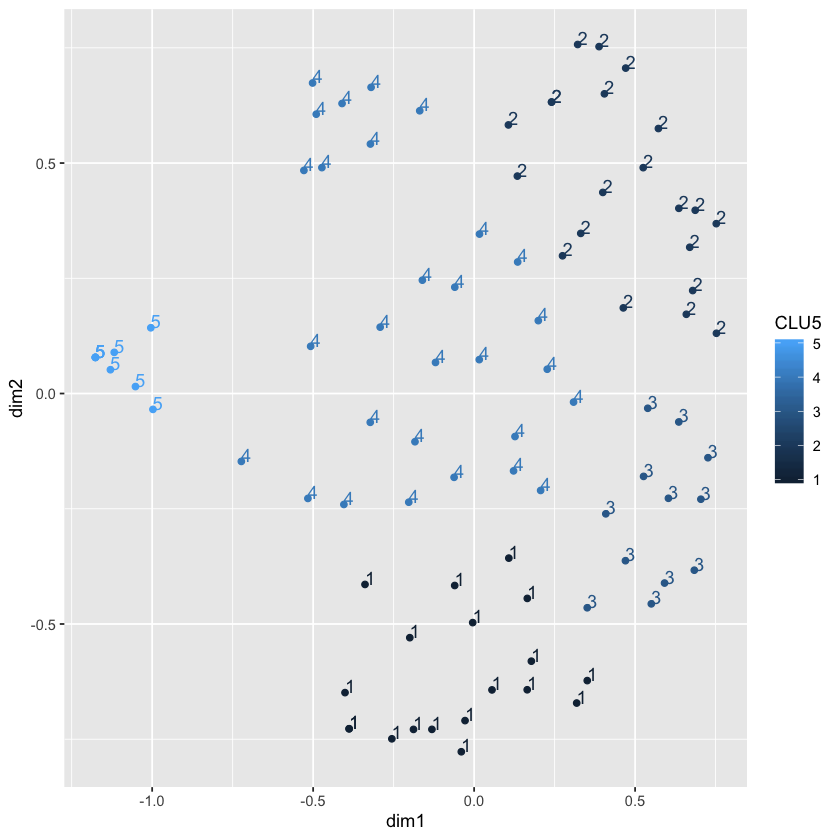

In [7]:
ggplot(output,aes(x = dim1, y = dim2, color = CLU5, label = CLU5)) + geom_point() + geom_text(aes(label=CLU5),hjust=0, vjust=0)

In [9]:
#install.packages(c('tm', 'SnowballC','NLP'))
library(tm)
library(SnowballC)
library(NLP)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




In [10]:
str(unsorted$unsorted_content)

 chr [1:81] "Be interesting and easy to learn from." ...


# Pre-processing the Data

In [11]:
# Create corpus
 
corpus = VCorpus(VectorSource(unsorted$unsorted_content))
# corpus$content

In [12]:
strwrap(corpus[[1]])

[1] "Be interesting and easy to learn from."

In [13]:
# Convert to lower-case

corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, stripWhitespace)

In [14]:
strwrap(corpus[[1]])

[1] "be interesting and easy to learn from"

In [15]:
# Remove stopwords and apple

corpus = tm_map(corpus, removeWords, stopwords("english"))

strwrap(corpus[[1]])


[1] "interesting easy learn"

# Clustering Unsupervised Analysis

In [16]:
mat <- DocumentTermMatrix(corpus)
mat

<<DocumentTermMatrix (documents: 81, terms: 271)>>
Non-/sparse entries: 474/21477
Sparsity           : 98%
Maximal term length: 26
Weighting          : term frequency (tf)

In [17]:
mat4 <- weightTfIdf(mat)
mat4 <- as.matrix(mat4)
mat4

,access,accessattend,accessible,address,adult,advance,affects,amount,applicable,approach,⋯,updated,use,variety,way,well,wellknown,wide,widely,will,work
1,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
2,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
3,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
4,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
5,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
6,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
7,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
8,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,1.584963,0,0.0000000,0,0
9,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0
10,0,0.000000,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0,0,0.0000000,0.000000,0,0.0000000,0,0


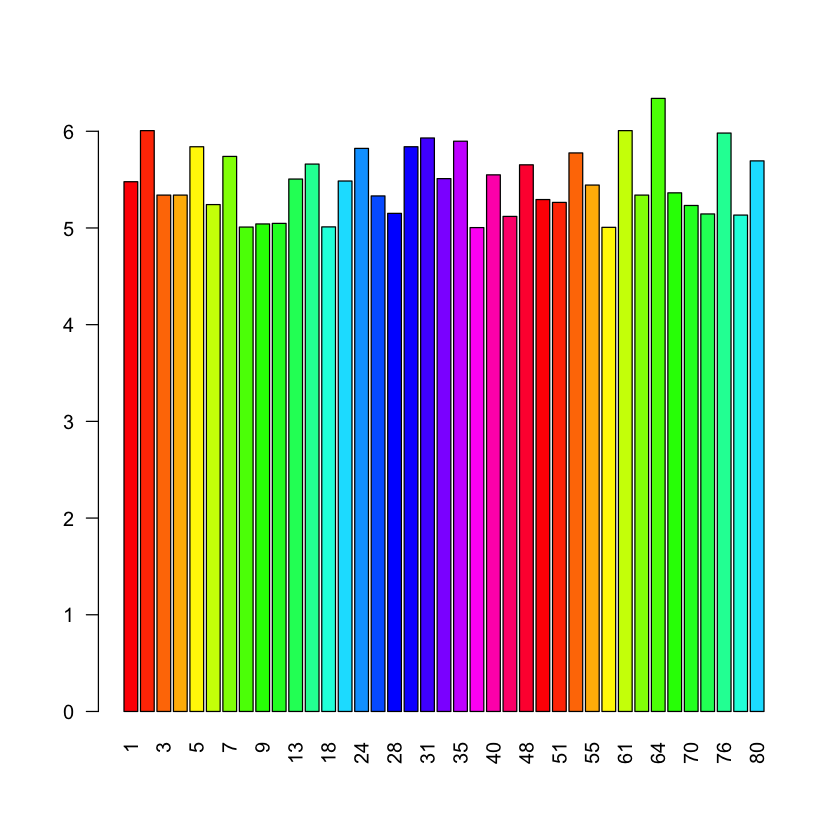

In [18]:
freq <- rowSums(mat4)
freq <- subset(freq, freq >= 5)
barplot(freq, las = 2, col = rainbow(25))

## K-Means Clustering

In [21]:
#install.packages('proxy')

In [22]:
dist.matrix = proxy::dist(mat4, method = "cosine") 

In [23]:
norm_eucl <- function(m){
    m/apply(m,1,function(x) sum(x^2)^.5)
}
mat_norm <- norm_eucl(mat4)

In [24]:
set.seed(5)
k <- 5 # number of cluster groups
kmeansResult <- kmeans(mat_norm, k)
kmeansResult
head(kmeansResult$cluster)

K-means clustering with 5 clusters of sizes 6, 7, 5, 58, 5

Cluster means:
       access accessattend  accessible   address       adult     advance
1 0.000000000   0.00000000 0.000000000 0.0000000 0.000000000 0.000000000
2 0.000000000   0.00000000 0.055454741 0.0000000 0.000000000 0.000000000
3 0.000000000   0.00000000 0.000000000 0.0000000 0.000000000 0.000000000
4 0.005045057   0.01318707 0.008374697 0.0278994 0.005045057 0.005864907
5 0.000000000   0.00000000 0.000000000 0.0000000 0.000000000 0.000000000
     affects      amount applicable    approach appropriate        area
1 0.00000000 0.000000000 0.00000000 0.000000000 0.000000000 0.000000000
2 0.00000000 0.000000000 0.00000000 0.000000000 0.000000000 0.000000000
3 0.00000000 0.000000000 0.00000000 0.000000000 0.000000000 0.000000000
4 0.00000000 0.009735746 0.01995729 0.004772354 0.005191141 0.007293644
5 0.06982849 0.000000000 0.00000000 0.000000000 0.000000000 0.000000000
  attendings   attract  attractive   audience  auditori

1 2 3 4 5 6 
4 4 4 4 4 4

In [25]:
summary(kmeansResult$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   4.000   3.605   4.000   5.000 

In [26]:
points <- cmdscale(dist.matrix, k = 2) 

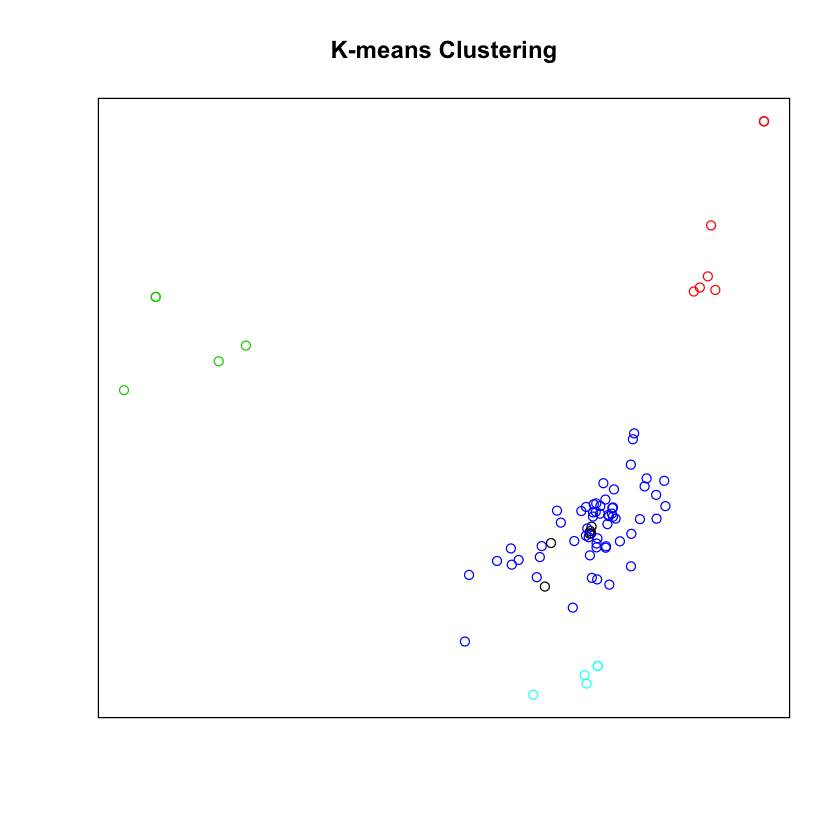

In [27]:
plot(points,col = as.factor(kmeansResult$cluster), main = 'K-means Clustering',mai = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), 
     xaxt = 'n', yaxt = 'n', xlab = '', ylab = '')

## Hierarchical Clustering

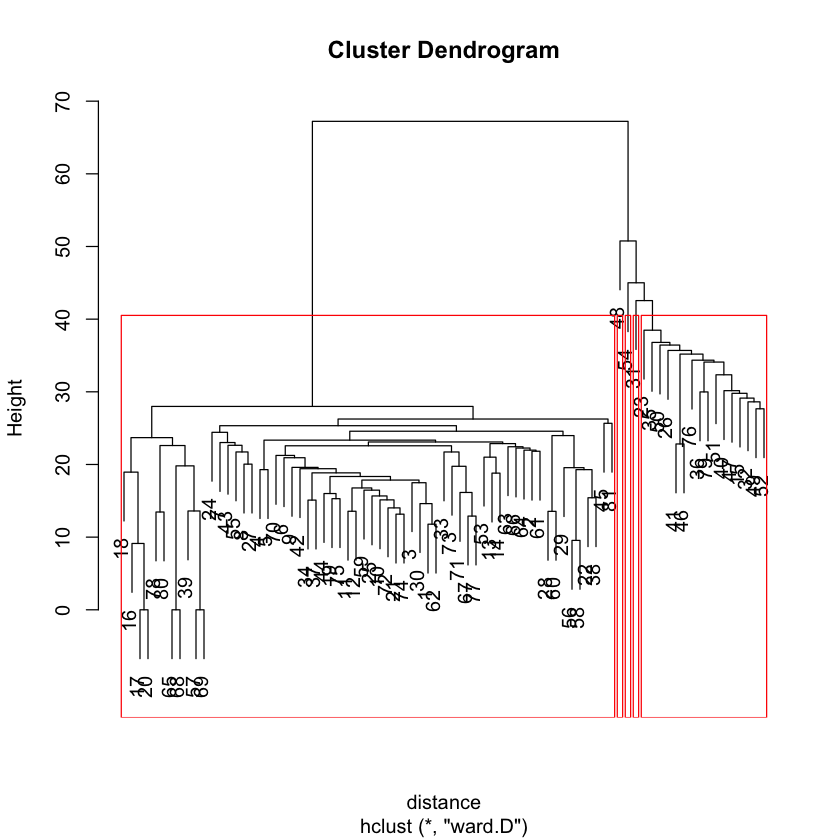

In [28]:
distance <- dist(scale(mat4))
#print(distance, digits = 2)
hc <- hclust(distance, method = "ward.D")
plot(hc)
rect.hclust(hc, k = 5)

# Model Performance

In [29]:
result <- data.frame('actual' = unsorted$unsorted_content, 'predicted' = kmeansResult$cluster)
head(result)

,actual,predicted
,<fct>,<int>
1,Be interesting and easy to learn from.,4
2,Give quality lectures,4
3,Have an engaging speaker.,4
4,Bring national figures to present,4
5,Get national and international speaker/experts,4
6,Include some of the best speakers in the country,4


In [30]:
result <- result[order(result[,1]),]
head(result)

,actual,predicted
,<fct>,<int>
71,Address a variety of professions,4
77,Address general clinical issues,4
67,Address important issues.,4
19,Attract more presentations with cutting edge research.,3
29,Be accessible to busy clinicians and have good topics,4
15,Be an avenue for disseminating updated clinical guidelines in a timely manner,4


In [31]:
result$counter <- -1
result.agg <- aggregate(counter ~ actual + predicted, data = result, FUN = 'sum')
head(result.agg)

,actual,predicted,counter
,<fct>,<int>,<dbl>
1,Be evidence based,1,-1
2,Be evidence based and deliver the newest guidelines,1,-1
3,Be practical,1,-1
4,Be practical. Pick common problems for review.,1,-1
5,Continue to provide practical education to practice problems.,1,-1
6,Focus on evidence and provide references to that evidence.,1,-1


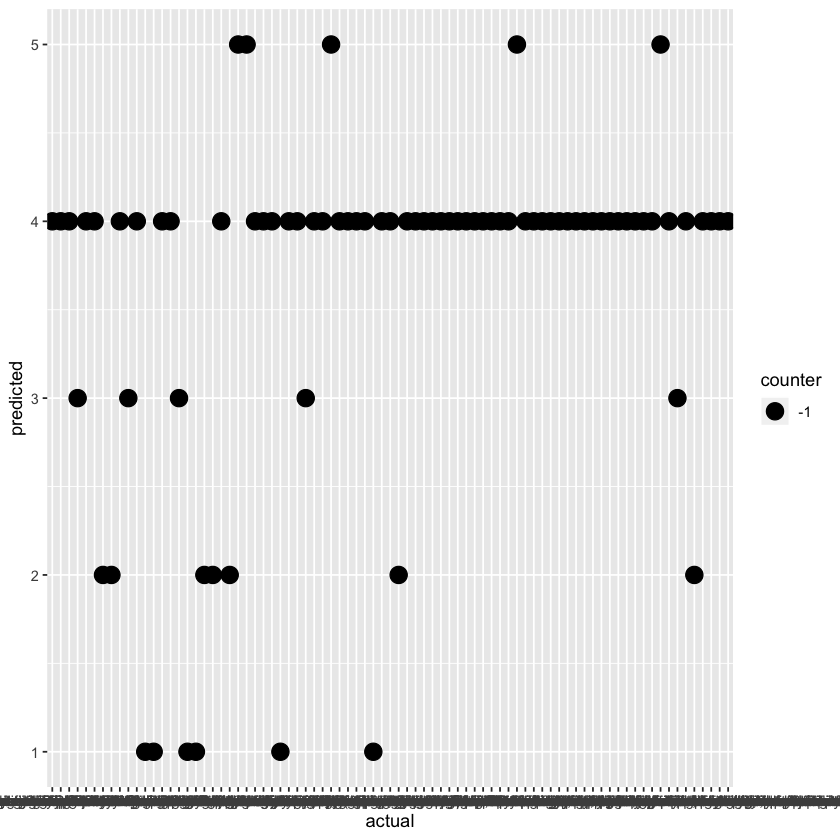

In [32]:
ggplot(data = result.agg, aes(x=actual, y=predicted, size = counter)) + geom_point()

## Supervised Analysis

In [33]:
output_data <- output[, c(13, 15)]
head(output_data)

CLU5,item_text
<dbl>,<chr>
1,1. Challenge the audience to question their practice
2,"2. Cover novel therapies, techniques, and concepts"
3,3. Provide a forum for topics of health and education that are relevant to this organization and to the community at large.
1,4. Presentations in which clinical issues are discussed in a case presentation format by specialists and allowing for the opportunity for comments and questions.
4,5. Cover areas from this organization's strategic plan.
2,"6. Present speakers and ideas that are ""out of the box"" such as the recent one about the beauty of patients with chronic medical problems."


In [34]:
tail(output_data)

CLU5,item_text
<dbl>,<chr>
2,"85. Present state of the art clinical care - new findings, great projects demonstrating outcomes and important psychosocial / professional issues."
4,"86. Be free from political and/or organizational agendas or what senior management has determined to be the latest catch phrase, trend, or ""in"" thing."
1,"87. Stimulate the audience to make changes in their practice, for instance a recent grand rounds helped me to see that my usual cheery entrance into an exam room may threaten a sensitive patient"
1,88. Be accessible in offices
4,89. Cover topics that call for community and multidisciplinary involvement
4,"90. Identify colleagues involved in similar issue, practices, and projects."


## Pre-Process 

In [35]:
corpus_output <- VCorpus(VectorSource(output_data$item_text))

In [36]:
corpus_output <- tm_map(corpus_output, content_transformer(tolower))
corpus_output <- tm_map(corpus_output, removeNumbers)
corpus_output <- tm_map(corpus_output, removePunctuation)
corpus_output <- tm_map(corpus_output,stripWhitespace)
corpus_output <- tm_map(corpus_output, removeWords, stopwords('english'))
strwrap(corpus_output[[1]])

[1] "challenge audience question practice"

In [37]:
frequencies <- DocumentTermMatrix(corpus_output,
                                 control = list(tolower = TRUE,
                                            removeNumbers = TRUE,
                                            stopwords = TRUE,
                                            removePunctuation = TRUE,
                                            stemming = TRUE))
frequencies

<<DocumentTermMatrix (documents: 90, terms: 356)>>
Non-/sparse entries: 666/31374
Sparsity           : 98%
Maximal term length: 18
Weighting          : term frequency (tf)

## Sparse

In [38]:
inspect(frequencies)

<<DocumentTermMatrix (documents: 90, terms: 356)>>
Non-/sparse entries: 666/31374
Sparsity           : 98%
Maximal term length: 18
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs care clinic clinician cover inform organ practic present provid topic
  10    0      1         0     0      0     0       0       0      0     0
  11    0      0         1     0      1     0       0       1      1     0
  39    2      1         0     0      0     0       0       0      0     1
  4     0      1         0     0      0     0       0       2      0     0
  41    0      0         2     0      0     0       0       0      0     0
  58    1      0         1     0      1     0       0       0      1     0
  83    1      0         1     0      0     0       0       0      1     0
  85    1      1         0     0      0     0       0       1      0     0
  86    0      0         0     0      0     0       0       0      0     0
  87    0      0         0     0      0     0  

In [39]:
findFreqTerms(frequencies, lowfreq = 10)

[1] "care"      "clinic"    "clinician" "inform"    "organ"     "practic"  
[7] "present"   "provid"    "topic"

So out of 356 words in our matrix only 9 words appear at least 10 times in our data. 
* the number of terms is an issue for 2 main reasons: 
    1. more terms means more independent variables, which means it takes longer to build our models. 
    2. The ration of independent variables to observations will affect how good the model will generelaize. 

In [40]:
sparse <- removeSparseTerms(frequencies, 0.995)
sparse

<<DocumentTermMatrix (documents: 90, terms: 356)>>
Non-/sparse entries: 666/31374
Sparsity           : 98%
Maximal term length: 18
Weighting          : term frequency (tf)

In [41]:
output_sparse <- as.data.frame(as.matrix(sparse))
head(output_sparse)

,academ,access,achiev,adopt,adult,advoc,agenda,agent,align,allow,⋯,well,whole,wide,will,work,world,worldrenown,worldwid,year,younger
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [42]:
colnames(output_sparse) <- make.names(colnames(output_sparse))

In [43]:
output_sparse$clusters <- as.factor(output$CLU5)
head(output_sparse)

,academ,access,achiev,adopt,adult,advoc,agenda,agent,align,allow,⋯,whole,wide,will,work,world,worldrenown,worldwid,year,younger,clusters
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2


## Split Data into Training & Testing 

In [44]:
#install.packages(c('caTools', 'rpart','rpart.plot'))


The downloaded binary packages are in
	/var/folders/d5/g3x3m16j4g77jkr7m0s_qgtm0000gn/T//RtmpTkiH9n/downloaded_packages


In [45]:
library(caTools)
library(rpart)
library(rpart.plot)

In [46]:
set.seed(123)
split <- sample.split(output_sparse$clusters, SplitRatio = 0.7)

trainSparse <- subset(output_sparse, split == TRUE)
testSparse <- subset(output_sparse, split == FALSE)

## CART Model

In [47]:
# Build a CART model

outputCART <- rpart(clusters ~ ., data = trainSparse, type = "class")
prp(outputCART)

ERROR: Error in rpart(clusters ~ ., data = trainSparse, type = "class"): Argument type not matched


In [48]:
# Evaluate the performance of the model
predictCART = predict(outputCART, newdata=testSparse, type="class")

table(testSparse$clusters, predictCART)


ERROR: Error in predict(outputCART, newdata = testSparse, type = "class"): object 'outputCART' not found


## Random Forest Classification

In [50]:
#install.packages('randomForest')
library(randomForest)

In [51]:
set.seed(123)

outputRF <- randomForest(clusters ~ ., data = trainSparse)

In [57]:
outputRF


Call:
 randomForest(formula = clusters ~ ., data = trainSparse) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 18

        OOB estimate of  error rate: 69.35%
Confusion matrix:
  1 2 3  4 5 class.error
1 2 3 0  8 0   0.8461538
2 0 2 0 13 0   0.8666667
3 0 0 0  8 0   1.0000000
4 2 4 1 13 0   0.3500000
5 0 0 0  4 2   0.6666667

In [52]:
# compare with baseline model
table(testSparse$clusters)


1 2 3 4 5 
6 6 4 9 3 

In [53]:
# Make Predictions

predictRF <- predict(outputRF, newdata = testSparse)
table(testSparse$clusters, predictRF)

   predictRF
    1 2 3 4 5
  1 3 1 0 2 0
  2 0 0 0 6 0
  3 0 2 0 2 0
  4 0 0 0 9 0
  5 0 0 0 2 1

In [54]:
# Accuracy 
(3+0+0+9+1)/(3+1+2+6+2+2+9+2+1)

[1] 0.4642857

## --- CLOSE ---

In [316]:
mat4_output <- weightTfIdf(mat_output)
mat4_output

<<DocumentTermMatrix (documents: 90, terms: 356)>>
Non-/sparse entries: 666/31374
Sparsity           : 98%
Maximal term length: 18
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [317]:
mat4_output <- as.matrix(mat4_output)
dim(mat4_output)
head(mat4_output)

[1]  90 356

academ,access,achiev,adopt,adult,advoc,agenda,agent,align,allow,⋯,well,whole,wide,will,work,world,worldrenown,worldwid,year,younger
0,0,0,0,0,0,0,0,0,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0.5409878,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0.0000000,⋯,0,0,0,0,0,0,0,0,0,0


## 1. NaiveBayes classifier

In [318]:
library(e1071)
#library(topicmodels) 
#require(plyr)
#library(RTextTools, lib.loc = 'Library/Frameworks/R.framework/Versions/3.6/Resources/library/RTextTools-master/')

## Functions from RTextTools

In [319]:
recall_accuracy <- function(true_labels, predicted_labels) 
{
    true_labels <- as.vector(true_labels)
    predicted_labels <- as.vector(predicted_labels,mode=class(true_labels))
    analyze <- predicted_labels == true_labels

    accuracy <- length(analyze[analyze == TRUE])/length(true_labels)
    return(accuracy)
}

create_container <- function(matrix,labels,trainSize=NULL,testSize=NULL,virgin) {
    if (is.null(trainSize) && is.null(testSize)) stop("You must specify either a trainSize or testSize parameter, or both.")
    if (is.null(trainSize)) trainSize <- testSize
    if (is.null(testSize)) testSize <- trainSize

    totalSize <- sort(unique(append(trainSize,testSize)))
    column_names <- colnames(matrix)
    data_matrix <- as.compressed.matrix(matrix[totalSize])
    
    matrix_train_predict <- data_matrix[trainSize,]
    matrix_test_predict <- data_matrix[testSize,]

    train_code <- as.factor(labels[trainSize])
    if (length(unique(is.na(train_code))) > 1) stop("All data in the training set must have corresponding codes.")
    
    test_code <- as.factor(labels[testSize])
    if (virgin == FALSE && length(unique(is.na(test_code))) > 1) stop("The data to be classified does not have corresponding codes. To treat this data set as virgin data, set virgin=TRUE.")
    
    container <- new("matrix_container", training_matrix=matrix_train_predict, classification_matrix=matrix_test_predict, training_codes=train_code, testing_codes=test_code, column_names=column_names, virgin=virgin)
    
    gc()
    return(container)
}

train_model <- function(container, algorithm=c("SVM","SLDA","BOOSTING","BAGGING","RF","GLMNET","TREE","NNET","MAXENT"), ...) {
        
        # CLEAN UP FROM PREVIOUS MODEL TRAINED
        gc()
        
        # CONDITIONAL TRAINING OF MODEL
        if (algorithm=="SVM") {
			model <- svm(x=container@training_matrix, y=container@training_codes, probability=TRUE, ...)
		} else if (algorithm=="SLDA") {
           model <- slda(container.training_codes ~ ., data=data.frame(as.matrix(container@training_matrix),container@training_codes), ...)
        } else if (algorithm=="BOOSTING") {
            model <- LogitBoost(xlearn=as.matrix(container@training_matrix), ylearn=container@training_codes, ...)
        } else if (algorithm=="BAGGING") {
            model <- bagging(container.training_codes ~ ., data=data.frame(as.matrix(container@training_matrix),container@training_codes), ...)
        } else if (algorithm=="RF") {
            model <- randomForest(x=as.matrix(container@training_matrix), y=container@training_codes, ...)
        } else if (algorithm=="GLMNET") {
			training_matrix <- as(container@training_matrix,"sparseMatrix")
            model <- glmnet(x=training_matrix, y=container@training_codes, family="multinomial", ...)
        } else if (algorithm=="TREE") {
            model <- tree(container.training_codes ~ ., data=data.frame(as.matrix(container@training_matrix),container@training_codes), ...)
        } else if (algorithm=="NNET") {
            model <- nnet(container.training_codes ~ ., data=data.frame(as.matrix(container@training_matrix),container@training_codes), ...)
        } else if (algorithm=="MAXENT") {
			model <- maxent(container@training_matrix,as.vector(container@training_codes), ...)
		} else {
			stop("ERROR: Invalid algorithm specified. Type print_algorithms() for a list of available algorithms.")
		}
		
		# RETURN TRAINED MODEL
		gc() # CLEAN UP AFTER MODEL
		return(model)
}

classify_model <-
function(container, model, s=0.01, ...) {

	gc()
    extract_maximum_prob <- function(x) return(x[which.max(x)])
    extract_label_from_prob <- function(x) return(which.max(x))
	extract_label_from_prob_names <- function(x) return(rownames(as.matrix(which.max(x))))
    
    if (pmatch("svm",class(model),nomatch=0) > 0){
        svm_results <- predict(model,container@classification_matrix, prob=TRUE, ...) #Extract Label
        svm_pred <- svm_results[1:length(svm_results)]
        svm_prob <- apply(attr(svm_results,"prob"),1,extract_maximum_prob)

        results_table <- data.frame(as.character(svm_pred),svm_prob) #need to chang svm_pred to numeric for agreescore creation
        colnames(results_table)[1] <- "SVM_LABEL"
        colnames(results_table)[2] <- "SVM_PROB"
    } else
    
    if (pmatch("slda",class(model),nomatch=0) > 0){
        slda_results <- predict(model,data.frame(as.matrix(container@classification_matrix)),...)
		slda_pred <- apply(slda_results$posterior,1,extract_label_from_prob_names) #Extract Label Based on Probability
		slda_prob <- apply(slda_results$posterior,1,extract_maximum_prob) #Extract Highest Probability
        
        results_table <- data.frame(as.character(slda_pred),slda_prob)
        colnames(results_table)[1] <- "SLDA_LABEL"
		colnames(results_table)[2] <- "SLDA_PROB"
    } else

    if (pmatch("LogitBoost",class(model),nomatch=0) > 0) {
        lboost_results <- predict(model,xtest=as.matrix(container@classification_matrix),type="raw",...) #Probability
        lboost_pred <- apply(lboost_results,1,extract_label_from_prob_names) #Extract Label Based on Probability
        lboost_prob <- apply(lboost_results,1,extract_maximum_prob) #Extract Highest Probability
        
        results_table <- data.frame(as.character(lboost_pred),lboost_prob)
        colnames(results_table)[1] <- "LOGITBOOST_LABEL"
        colnames(results_table)[2] <- "LOGITBOOST_PROB"
    } else
    
    if (pmatch("classbagg",class(model),nomatch=0) > 0) {
        bagging_results <- predict(model,newdata=data.frame(as.matrix(container@classification_matrix)), type=c("prob"),...)
        bagging_pred <- apply(bagging_results,1,extract_label_from_prob_names) #Extract Label Based on Probability
        bagging_prob <- apply(bagging_results,1,extract_maximum_prob) 
        
        results_table <- data.frame(as.character(bagging_pred),bagging_prob)
        colnames(results_table)[1] <- "BAGGING_LABEL"
        colnames(results_table)[2] <- "BAGGING_PROB"
    } else
    
    if (pmatch("randomForest",class(model),nomatch=0) > 0){
        rf_results <- predict(model,newdata=as.matrix(container@classification_matrix),type="prob",...)
		rf_pred <- apply(rf_results,1,extract_label_from_prob_names)
        rf_prob <- apply(rf_results,1,extract_maximum_prob)

        results_table <- data.frame(as.character(rf_pred),rf_prob)
        colnames(results_table)[1] <- "FORESTS_LABEL"
        colnames(results_table)[2] <- "FORESTS_PROB"
    } else
    
    if (pmatch("glmnet",class(model),nomatch=0) > 0){
		classification_matrix <- as(as.matrix.csc(container@classification_matrix),"dgCMatrix")
		#colnames(classification_matrix) <- container@column_names
        glmnet_results <- predict(model,newx=classification_matrix,s=s,type="response",...)
        glmnet_pred <- apply(glmnet_results[,,1],1,extract_label_from_prob_names) 
        glmnet_prob <- apply(glmnet_results,1,extract_maximum_prob) 
        
        results_table <- data.frame(as.character(glmnet_pred),glmnet_prob)
        colnames(results_table)[1] <- "GLMNET_LABEL"
        colnames(results_table)[2] <- "GLMNET_PROB"
    } else
    
    if (pmatch("tree",class(model),nomatch=0) > 0){
        tree_results <- predict(model,newdata=data.frame(as.matrix(container@classification_matrix)), type="vector",...)
        tree_pred <- apply(tree_results,1,extract_label_from_prob_names)
        tree_prob <- apply(tree_results,1,extract_maximum_prob) 
        
        results_table <- data.frame(as.character(tree_pred),tree_prob)
        colnames(results_table)[1] <- "TREE_LABEL"
        colnames(results_table)[2] <- "TREE_PROB"
    } else

    if (pmatch("nnet",class(model),nomatch=0) > 0){
        nnet_results <- predict(model,newdata=data.frame(as.matrix(container@classification_matrix)),...) #probabilities
        nnet_pred <- apply(nnet_results,1,extract_label_from_prob_names) #Extract Highest Probability Score
        nnet_prob <- apply(nnet_results,1,extract_maximum_prob) #Extract Probability
        
        results_table <- data.frame(as.character(nnet_pred),nnet_prob)
        colnames(results_table)[1] <- "NNETWORK_LABEL"
        colnames(results_table)[2] <- "NNETWORK_PROB"
    } else
							   
	if (pmatch("maxent",class(model),nomatch=0) > 0) {
		maxent_results <- predict(model,container@classification_matrix,...)
		maxent_pred <- maxent_results[,1]
		maxent_prob <- apply(maxent_results[,-1],1,extract_maximum_prob)
		
		results_table <- data.frame(as.character(maxent_pred),as.vector(maxent_prob,mode="numeric"))
		colnames(results_table)[1] <- "MAXENTROPY_LABEL"
		colnames(results_table)[2] <- "MAXENTROPY_PROB"
	}
	
	return(results_table)
}


In [320]:
y <- output_data[sample(1:nrow(output_data)),]
y <- y$CLU5

In [321]:
classifier <- naiveBayes(mat4_output[1:60,], y[1:60])
predicted <- predict(classifier, as.matrix(mat4_output[61:90,]))


In [322]:
table(predicted,output_data$CLU5[61:90])

ERROR: Error in table(predicted, output_data$CLU5[61:90]): all arguments must have the same length


In [323]:
container <- create_container(sparse, output_data$CLU5, trainSize = 1:60, testSize = 61:90, virgin = FALSE)
container

ERROR: Error in as.compressed.matrix(matrix[totalSize]): could not find function "as.compressed.matrix"
